# Aula 5 - DataSets e Data *Preprocessing*

# Data Sets
---


### O que é um Data Set? Um "conjunto de dados"? 

É na verdade uma **coleção de objectos (data Objects)** .
Assim, relembrando programação por obejctos

<font style="color:forestgreen">

Um objecto é uma instância de uma qualquer classe
</font>

Em data mining, pode tambem ser chamado de  **Registo**, **sample** ou **item**


### Um objecto é constituído por 

<font style="color:forestgreen">
Atributos (descrevem objetos) são características de um "objeto" que variam de objecto para objecto ou ao longo do tempo, para o mesmo "objeto". </font>
Também chamados de variáveis, campos, características, dimensão ou **features** (esta última muito usada em Machine Learning)




# Attributos ou Features

Features podem ser Categóricos (qualitativos) Vs Quantitativos



#### Atributos Discretos Qualitativos

- Contem a noção de ordem e podem ter operações sobre eles.
- **Um atributo discreto qualitiativo possui apenas um conjunto finito ou contável de valores.** Por exemplo: contagens de pessoas por Freguesia ou conjunto de palavras num documento;


#### Atributos Contínuos  (Quantitativos)

- **Um atributo contínuo tem valores de números reais.** Por exemplo, Temperatura, altura ou peso 
- Os atributos contínuos são tipicamente representados como variáveis de virgula flutuante (floating point);

## Categóricos (Qualitativos)

Features Qualitativas, são "etiquetas" que podemos usar para caracterizar um objecto. No máximo existe uma ordem, mas normalmente trata-se simplesmente de um identificador de uma dada característica.

Por exemplo, num cliente, os atributos: 
- Tipo de Cliente: {Contacto, Prospect, Cliente Cliente Premium} - Etiqueta com ordem subjacente;
- Região: {Norte Sul, Centro, Ilhas} - Etiqueta sem ordem subjacente;

Entre atributos Qualitativos, distinugimos

#### Atributos Discretos Qualitativos

- Contem a noção de ordem;
- **Um atributo discreto possui apenas um conjunto finito ou contável de valores.** Por exemplo: Código postal;
- Pode m ou não ser representados por números mas essa numeração é meramente uma etiqueta (ão sao feitas operações de somar sobre codigos postais!)

#### Atributos Binários (Qualitativos)

- **Os atributos binários são um caso especial de atributos discretos e assumem apenas dois valores**
- Por exemplo. {Sim,Não}, {True, False}, {masculino, feminino}
- Os atributos binários são frequentemente representados como variáveis booleanas ou como variáveis inteiras que assumem os valores 0 ou 1, associados a uma codificação

# Caractetrísticas de Um DataSet

Têm genericamente 3 características importantes:

- **Dimensionalidade** - é o número de atributos (dimensões como veremos no proximo slide). 
> Aside: 
> The Curse of dimensionality - Dificuldade em analisar dados com muitas dimensões; Por causa disto, muitas vezes procura-se reduzir a dimensão do dataset (dimensionality Reduction)
- **Sparsity** - Quão distantes estão valores com significado uns dos outros; 
> Exemplo: 
> Se guardarmos um dataset de cidadãos com uma propriedade pouco comum (por exemplo pessoas com registo criminal), este data set pode listar somente os cidadão com registo criminal em vez de ter a lista de todos os cidadãos (uma vez que são muito poucos os que têm esse campo a 1)
- **Resolution** - Define com que detalhe sabemos a informação que estamos a listar.
> Google earth, tem "datasets" diferentes consoante a resolução da imagem;

# Tipos de DataSets

- **Record Data** - Registos semelhantes a uma tabela; Como exemplos:
    - Dados de Transacções comerciais com multiplos items
    - Dados sobre clientes em forma matricial, em que os atributos são os mesmos para todos os objectos
    
- **Graph-based Data** - Grafos com multiplas conexões (relações) entre objectos. Por exemplo:
    - Links entre paginas web.
    - Relações complexas entre registos de uma base de dados;
    
- **Ordered Data** - Valores cuja ordem em que aparecem são relevantes. Por exemplo: 
    - Arrays temporais de grandezas físicas(Temperatura, etc.), valores de mercado, etc;
    - Arrays Espacio-Temporais (mapa espacial de população de um país ao longo do tempo);
    - Sequencia do DNA;
    

# DataSets Como Nuvens de Vectores

Vamos Imaginar que temos o seguinte conjunto de dados sobre vendas:

|Código do Produto|Preço (€)|Vendas Mensais (unid/mes)|Volume ($cm^3$)|
|-|-|-|-|
|fdadfda3-3ca7-4aa4-aa28-50040b64c9bd|360| 38427|60|
|87f28442-a248-44a4-9db0-c88bbdf565b4|159| 35229|90|
|1064a1a4-2bdb-4082-8d5a-50d04df9408e|266| 11497|77|
|e8a01f2b-d55e-4179-b3f0-15fe158a2917|333| 32054|66|
|8b67b061-0804-42cd-93c9-1296a24a985d|439| 47712|67|
|55254621-51ee-44b8-b734-b31227c3bae6|379| 48114|78|
|4d35871e-b971-4f3d-95ad-8066e7b8109a|311| 40238|94|
|3cbcfbef-840a-4ebd-892f-0417550fc00e|473| 12593|65|
|a1a39089-d282-4afd-a192-e48c1808074a|259| 34294|31|
...

Se consideramos que cada um destes valores (contínuos ou discretos), assume um eixo de um espaço euclideano, podemos representar os nossos dados assim:

In [2]:
A = [{"fdadfda3-3ca7-4aa4-aa28-50040b64c9bd":[360,38427,60]}, {"87f28442-a248-44a4-9db0-c88bbdf565b4":[159,35229,90]}, {"1064a1a4-2bdb-4082-8d5a-50d04df9408e":[266,11497,77]}, {"e8a01f2b-d55e-4179-b3f0-15fe158a2917":[333,32054,66]}, {"8b67b061-0804-42cd-93c9-1296a24a985d":[439,47712,67]}, {"55254621-51ee-44b8-b734-b31227c3bae6":[379,48114,78]}, {"4d35871e-b971-4f3d-95ad-8066e7b8109a":[311,40238,94]}, {"3cbcfbef-840a-4ebd-892f-0417550fc00e":[473,12593,65]}, {"a1a39089-d282-4afd-a192-e48c1808074a":[259,34294,31]}]
preco = [list(a.values())[0][0] for a in A]
vendas = [list(a.values())[0][1] for a in A]
vol = [list(a.values())[0][2] for a in A]


In [3]:
intX = (max(preco)-min(preco))/4
intY = (max(vendas)-min(vendas))/4
intZ = (max(vol)-min(vol))/4

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.set_xlim(min(preco)-intX, max(preco)+intX)
ax.set_ylim(min(vendas)-intY, max(vendas)+intY)
ax.set_zlim(min(vol)-intZ, max(vol)+intZ)
ax.scatter(preco, vendas, vol, c="black", s=30)
ax.set_xlabel('Preço')
ax.set_ylabel('Vendas Mensais')
ax.set_zlabel('Volume')
ax.view_init(elev=40., azim=-35)

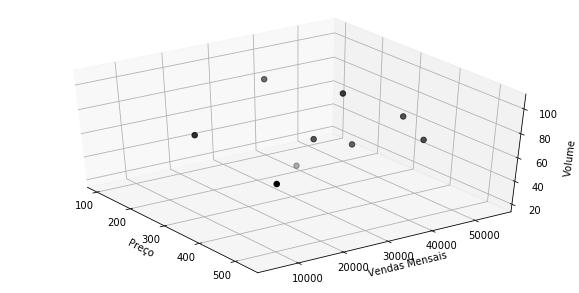

In [4]:
plt.show()

E se houvess 20 atributos?
Não tinha problema, nós não conseguimos ver porque seriam 20D em vez de 3D, mas:

**as "distâncias" dos pontos contínuam mensuráveis (ou seja, podemos aplicar uma métrica)**

$$Dist(a, b)=  \sqrt{(a_x-b_x)^2+(a_y-b_y)^2+...} = \sqrt{\sum{(a_i-b_i)^2}}$$

# DataSets Como Nuvens de Vectores (cont.)


Outro exemplo, são os dados provenientes de termos encontrados em documetos para classificação. Cada termo (ou palavra) pode ser quantificado pelo número de vezes que aparece no documento e assim representado vectorialemente, tal como no exemplo anterior


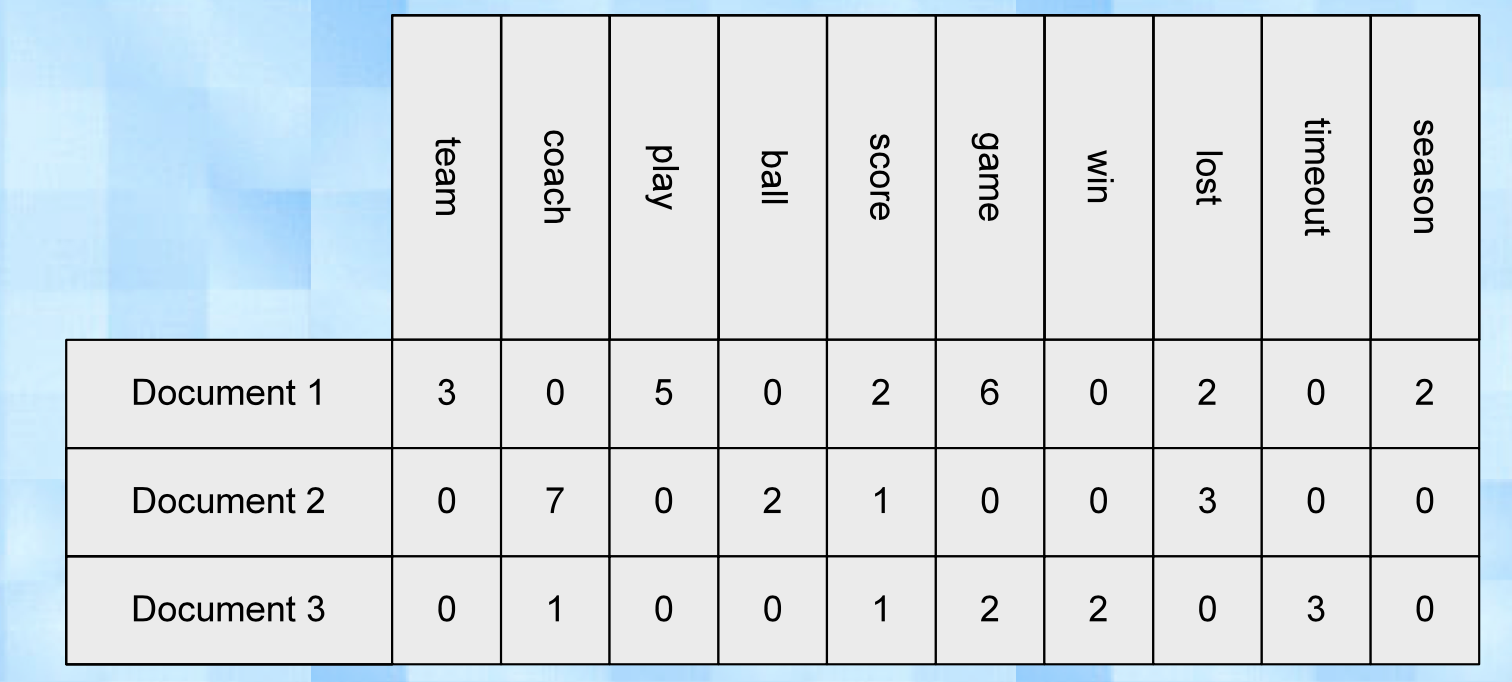

<img src="images/vectorcloud.png" style="width:40%"/>






# Data Quality
---

- **Noise (ruído)** - Componente aleatória do erro de medição 
- **Artefactos** - Componente determinística de um erro de medição que gera distorções reconhecidas 
- **Outliers** - Objectos Anómalos, inseperados; 
- **Missing values** 
- **Duplicate data**

### Exemplo com base num detector de videos com gatos:

> **Ruído:** flutuação da câmara de filmar devido à mão do fotógrafo abanar

> **Artefactos:** risco na lente da câmara de filmar ao longo de todos dos dados (videos);

> **Outliers:** imagens com 2 gatos, quando so se esperava 1 gato por imagem;


### Como gerir missing data: 

- **Ignorar objetos com valores em falta** - grandes quantidades de dados perdidos ?!
- **Estimar a partir de dados "Vizinhos"** - Dados em falta de acções na bolsa (ou consumos de energia eléctrica) podem ser encontrados por interpolação de vizinhos. 

> Aside:

> No caso de classes, uma abordagem tipo nearest neighbor pode ser usada para determinar a classe mais provável;


# Preprocessamento de Dados 

---

Esta área é absolutamente fundamental em Data Mining, em particular em sistemas de Apoio à Decisão. 

> Na realidade estamos a Falar do "Transform" num sistema de ETL ou ELT;

Vamos falar de 2 tipos de preprocessamento: 

1) **Preparação de Dados** - Para que os modelos possam ser aplicaveis aos dados

- Binarização
- Discretização
- Normalização
- Transformação


2) **Redução da quantidade de dados** - para que os modelos sejam implementáveis;

- Agregação 
- Sampling
- Redução de Dimensionalidade (Eliminar Atributos)


> De Referir que muitos dos métodos aqui falados são eles próprios alvo de algoritmos de *Machine Learning*, como aqueles que falaremos nas próximas aulas;

## Discretização e Binarização
---
<font style="color:forestgreen">
Alguns algoritmos obrigam à utilização de variáveis discretas em vez de contínuas.
</font>

O processo de criação (ou transformação) de variáveis contínuas em discretas pode ser feito por arredondando números reais para números inteiros; 

Caso a nova variável discreta so possa ter 2 valores distintos chama-se ao processo binarização (variável boleana).

## Discretização e Binarização (cont.)
---

**O problema de discretização de um atributo contínuo é por vezes, por si próprio, um problema de classificação**

Este problema pode ser

- **supervisionado** - caso se conheçam as "classes" do atributo destino
- **não supervisionado** - Caso se desconheça as classes de discretização 

Considere-se os seguintes dados onde os atributos são ambos contínuos:

<img src="./images/data_discretization.png"  style="width:60%"/>


> Quantas atributos existem? Quais são os seus intervalos de variação?

## Discretização e Binarização (cont.)

Vamos criar um atributo com base nestes dados que sejam ***labels*** discretas:

<img src="./images/data_discretization_w_groups.png"  style="width:60%"/>

Mas a criação destes grupos pode não ser tão clara em situações em que as "nuvens" são misturadas:

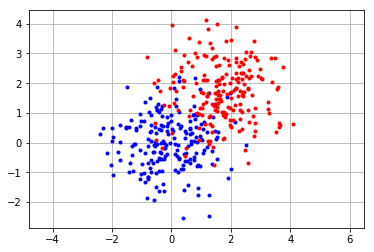

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.grid()
plt.axis('equal')
data1 = np.random.randn(200,2)
data2 = np.random.randn(200,2)+1.75
plt.plot(data1[:,0],data1[:,1],  '.', color="b")
plt.plot(data2[:,0],data2[:,1],  '.', color="r")
plt.show()

## Normalização
---
<font style="color:forestgreen">
A normalização dos dados pode fazer uma diferença muito considerável na convergência dos modelos de classificação e regressão.
</font>


A normalização permite que o algoritmo de aprendizagem possa aprender mais depressa, **estabelecendo uma relação entre features mais semelhante**. A normalização é feita aplicando média = 0 e desvio padrão ($\sigma[X]$) = 1 à feature $X$. Assim,

$$E[X] = 0 \longrightarrow X := X-E[X]$$ 

$$\sigma[X] = 1 \longrightarrow  X := X/\sigma[X]$$ 

Ambas, element wise.

---
> Recordando:

> $$E[X] = \frac{1}{N} \sum_{x=1}^N{x}$$

> $$var[X] = \frac{1}{N} \sum_{x=1}^N{(E[x]-x)^2} = E[x^2] - E[x]^2$$


> onde 

> - size($X$) = $N$
> - $var[X]$:  Variância global de $X$
> - $\sigma[X]$:  Desvio padrão de $X$, onde $\sigma[X] = \sqrt{var[X]}$
> - $E[X]$: valor esperado ou média de $X$


Segue um exemplo:

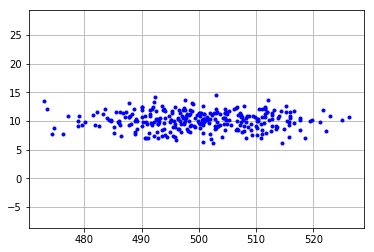

In [47]:
X = np.random.randn(300,2)*np.array([10,1.5]).reshape(1,2)+np.array([500,10]).reshape(1,2)
plt.figure()
plt.grid()
plt.axis('equal')
plt.plot(X[:,0],X[:,1],  '.', color="b")
plt.show()

Aplicando Normalização:

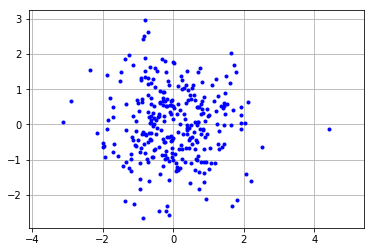

In [7]:
X_norm = X - np.average(X,axis=0)
X_norm_final = X_norm/np.sqrt(np.var(X_norm,axis=0))

plt.figure()
plt.grid()
plt.axis('equal')
plt.plot(X_norm_final[:,0],X_norm_final[:,1],  '.', color="b")
plt.show()


## Transformação de Features

---

Alguns algoritmos obrigam transformação de variáveis contínuas de forma a alterar o seu modo de influência no modelo.
Assim, pode ser usado qualquer tipo de função $f$ tal que a nova feature $Z$ seja dada por $Z = f(X)$.

São alguns exemplos:

$$Z = X^k$$

$$Z = log(X)$$

$$Z = e^X$$

$$Z = \sqrt X$$

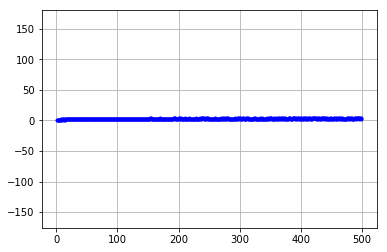

In [10]:
import math, random
import numpy as np
import matplotlib.pyplot as plt

Y = np.array([math.log(a,10)+random.random() for a in range(1,500)]).reshape(-1,1)
plt.figure()
X = np.array([range(1,500)]).reshape(-1,1)
plt.grid()
plt.axis('equal')
plt.plot(X,Y ,  '.', color="b")
plt.show()

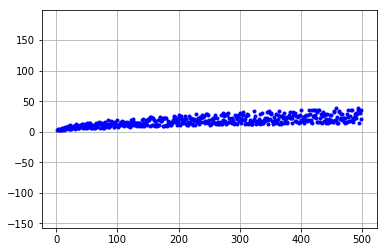

In [11]:
Y_plica = np.exp(Y)
plt.figure()
X = np.array([range(1,500)]).reshape(-1,1)
plt.grid()
plt.axis('equal')
plt.plot(X,Y_plica ,  '.', color="b")
plt.show()


## Agregação

---

<font style="color:forestgreen">
Diminuição do numero de Registos por agregação, de modo a reduzir informação a ser analisada;
</font>

### Como agregar: 
- Sum, Mean, Max, etc. para valores numéricos, consoante o objectivo. 

> No entanto, como fazer para classes? Vamos ver na Aula Prática alguns exemplos

### Porquê agregar?
- quando temos muitos dados (milhoes de dados de transações de vendas de uma cadeia de lojas ao longo de 5 anos), podemos não conseguir aplicar algoritmos a tantos dados, mas que se tornam praticáveis se considerarmos agrupamentos por dia, semana ou mes, por exemplo;



- Se considerarmos valores médios a variância reduz-se muito significativamente, pelo que os valores a analisar se tornam mais estáveis (o que perdemos? Resultados pontuais com significado)


In [52]:
import numpy as np

# Variável aleatória
A = np.random.rand(3,1)
A1 = np.random.rand(100,1)
A2 = np.random.rand(10000,1)
print(0.5-A.mean(), 0.5-A1.mean(), 0.5-A2.mean())


0.035131107988 0.0140176333174 -5.75095085129e-05


In [53]:
A = np.random.rand(100,1)

#variância da Variável
v = (sum(A)/A.shape[0]-A)**2
print("var1", sum(v)/A.shape[0])


B = A.reshape(5,20)
C = B.mean(axis=0)
v = (sum(C)/C.shape[0]-C)**2
print("var2", sum(v)/C.shape[0])

var1 [ 0.08884643]
var2 0.0160724869351


## Sampling
---
<font style="color:forestgreen">
Amostragem (ou sampling) é o processo de compreensão de características de dados ou modelos com base num subconjunto (sample) dos dados originais (universo de dados). 
</font>


É amplamente utilizado em todos os aspectos de datamining porque:

- Por vezes, obter todo o conjunto de "dados de interesse" é muito caro ou demorado
- Por vezes, obter todo o conjunto de dados pode não ser necessário (e, portanto, um desperdício de recursos)
- No desenvolvimento e afinação de algoritmos, o uso de um pequeno subset torna o processo itreativo de desenvolvimento muito mais rápido;


#### Representatividade da Sample

Uma sample tem que ser representativa do universo. A representatividade tem a ver com o objectivo/operação que se pretende realizar: uma sample pode ser representativa para um objectivo e não para outro;

#### Processos de Sampling:

- **Random  Sampling**: Existe uma probabilidade igual de selecionar qualquer registo para o sample, ou seja, a probabilidade de o registo $\theta$ do uiverso de M registos ser escolhido para o sample de dimensão $S$ é de 

$$P(\theta) = S/M$$

Pode ser feito com ou sem reposição;

- **Stratified Sampling**: usado quando subpopulações em análise variam significativamente de dimensão. **Considera-se random sampling por subgrupo**. Tome-se $N$ subgrupos para os quais é importante manter dados;  A probabilidade de um dado registo, pertencente ao subgrupo $i$ tem de ser escolhido é de   

$$P_i(\theta) = s_i/m_i$$

onde $S = \sum_i^N s_i$ é a dimensão do Sample e $M = \sum_i^N m_i$ é o universo de registos e $m$ é a quantidade de regsitos de cada subgrupo. 

> Note-se que este processo obriga à criação de subgrupos significativos para o processo que se segue à sample. Este processo chama-se de *Stratification*. E pode, ele prórpio usar algoritmos de *clustering* por exemplo, que falaremos mais à frente  

#### Dimensão do Sample

A sua dimensão é muito significativa porque: 

- Pequenos Samples tem menor probabilidade de serem representativos;
- Grandes Samples não trazem qualquer benefício face ao uso directo do universo de registos;


<img src="images/sampling.png"/>

## Redução de Dimensionalidade
---
<font style="color:forestgreen">
Porque é que é importante?

- Muitos algoritmos funcionam melhor se a dimensionalidade dos dados (ou seja, o número de atributos) é menor
- Permite que os dados sejam mais facilmente visualizados
- Se a redução da dimensionalidade elimina características irrelevantes ou reduz o ruído, a qualidade dos resultados pode melhorar
- Pode levar a um modelo mais compreensível

</font>

Vamos então rever se todas as features que estamos a usar são de facto relevantes. Se não são devemos tomar medidas para reduzir o número que usamos. Que medidas?

- ou **seleccionando** features realmente úteis (independentes) e descartando outras (*Redundant features ou Irrelevant features*)
- ou **transformando** os registos e suas features em registos com features compostas que sejam mais relevantes (representam a quantidade máxima de variação dos dados)



## Redução de Dimensionalidade (cont.)
---

### Seleccionando Features


#### Redundant features 

Atributos que têm as "mesma" informação, por exemplo: numa transacção, preço de um produto, IVA pago pelo produto

#### Irrelevant features 

Numa universidade, se o ID dos alunos for aleatóoio, é irrelevante para prever o sucesso do aluno.

### Transformando Features

Técnicas de álgebra Linear como PCA - Principal Component Analysis (semelhante ao SVD - singular value decomposition)

# Principal Component Analysis
(ou Singular Values Decomposition)

http://setosa.io/ev/principal-component-analysis/


PCA permite-nos descartar alguns dos eixos que não são representativos.

# Encodings para Features Discretas

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector 

$$ y = [1,2,3,0,2,1]$$


### One Hot encoding

If you convert it as  this


<img src="images/onehot.png" style="width:60%">


This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). 

# Model Training: DataSet Split
---


### Hold Out - Training set  and Test Set


- Método mais simples de validação de resultados.
- Dados são separados em 2 conjuntos: 
    - **Training Set** (~80% para in-memory data, <99% for bigdata/Deep Learning)
    - **Test Set** (~20% para in-memory data, <1% for bigdata/Deep Learning)

O Fit do modelos são feitos Training

<img src="./images/train_test.jpg" style="width:60%" />

## Overfitting and Underfitting

**Conceito de overfitting:** Por vezes o resultado do treino é um modelo demasiado à semelhança dos dados que foram usados para treinar e perdemos capacidade de generalização para novos dados. Nesse caso dizemos que o problema tem overfitting;

**Conceito de underfitting:** Por vezes o resultado do treino é um modelo mal treinado, onde os resultados representam um erro muito para além do esperado; Nesse caso estamos em underfitting;

O resultado prático de overfitting (variance) e underfitting (bias):

<img src="images/overfitting_underfitting.jpg"   style="width:60%"/>


> **Mas como saber qual a performance do nosso modelo?**

### Hold Out vs Cross Validation

<img src="images/From+Holdout+Evaluation+to+Cross-Validation.jpg" style="width:60%"/>